In [6]:
import pandas as pd
import numpy as np
import warnings as wg
wg.filterwarnings('ignore')

df = pd.read_csv('C:/Users/admin/Desktop/Skillathon/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Trout, Mrs. William H (Jessie L)",male,347082,G6,S
freq,1,577,7,4,644


### All of the data is self explonatory except SibSp, Parch, Embarked
### Sib/Sp: It is the number of sibings or spouses
### Parch : It is the number of Parents or childrens
### Embarked: Port of Embarkation C= Cherboug, S= Southamptom, Q = Queenstown

In [9]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
#Dropping the PassengerId  
df = df.drop(labels= 'PassengerId' , axis = 1, inplace = False)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
# converting the Survived to Categorical column.

df['Survived'] = df['Survived'].astype('object')

In [12]:
#printing the categorical columns and numerical columns 

cat = [x for x in df.columns if(df[x].dtype)=='object']
print("Categorical Columns: ", cat)

num = [x for x in df.columns if (df[x]. dtype =='int64') | (df[x]. dtype =='float64')]
print("Numerical Columns: ", num)

Categorical Columns:  ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


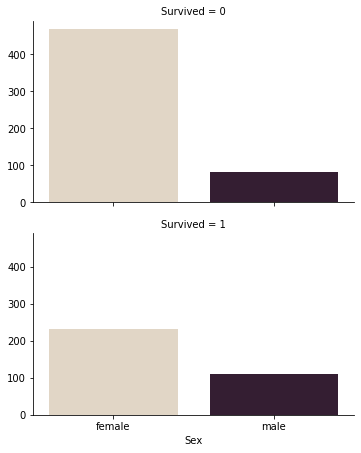

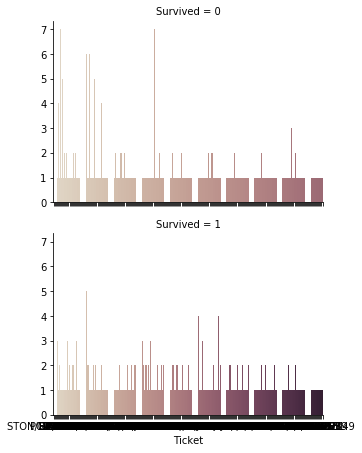

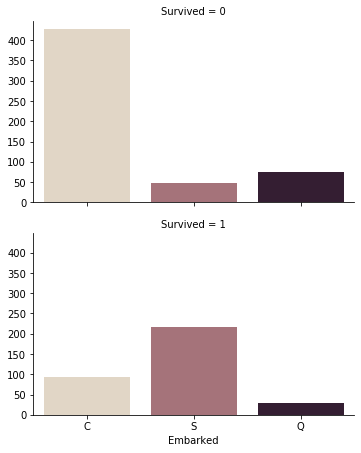

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Sex', 'Ticket', 'Embarked']

for cn in cols:
    grid = sns.FacetGrid(df, 'Survived', palette='ch:.26', size = 3.2, aspect= 1.6)
    grid.map(sns.countplot, cn, palette='ch:.26')
  
    plt.show()
    print(20*'===')

- When comes to sex There more Females who got surived but aslo there are more females who died.
- Coming to Embarked Category of S Survivied more rathar than other two categories and category of C died more in number.


In [15]:
#segregating the Categorical and numerical columns
categorical = df.loc[:, cat]
numerical = df.loc[:, num]
print(categorical.head())
print(numerical.head())

  Survived                                               Name     Sex  \
0        0                            Braund, Mr. Owen Harris    male   
1        1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2        1                             Heikkinen, Miss. Laina  female   
3        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4        0                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  
   Pclass   Age  SibSp  Parch     Fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500


## Handling the missing values in the Categorical Variables

In [16]:
# checking the Missing values in Categorical columns
categorical.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

- we drop the Cabin column in the Data Because there are lot of missing values in it. Eventhough if we replace it with the unique cabin number that generates too much bias in the model which we dont want at all.

In [17]:
#dropping the Cabin column.
categorical = categorical.drop(labels='Cabin', axis = 1, inplace= False)
categorical.head(3)

,Survived,Name,Sex,Ticket,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S


In [18]:
#now we handle the missing values in the Embarked
categorical = categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(categorical.isnull().sum())
categorical.head()

Survived    0
Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64


,Survived,Name,Sex,Ticket,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,0,"Allen, Mr. William Henry",male,373450,S


In [20]:
#Encoding the categorical into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    categorical[i] = le.fit_transform(categorical[i])
categorical.head()

,Survived,Name,Sex,Ticket,Embarked
0,0,108,1,523,2
1,1,190,0,596,0
2,1,353,0,669,2
3,1,272,0,49,2
4,0,15,1,472,2


In [24]:
categorical.head(3)

,Name,Sex,Ticket,Embarked
0,108,1,523,2
1,190,0,596,0
2,353,0,669,2


## Handling the missing values in numercal Columns

In [27]:
numerical.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [28]:
#Replacing the missing value with the mean values 
for i in numerical.columns:
    numerical[i] = numerical.apply(lambda x: x.fillna(numerical[i].median()))

In [29]:
print(numerical.isnull().sum())
numerical.describe()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,2.308642,2.308642,2.308642,2.308642
std,0.836071,0.836071,0.836071,0.836071,0.836071
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000


In [30]:
df.groupby('Survived').median()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,3,28.0,0,0,10.5
1,2,28.0,0,0,26.0


- The people with the highest Fare value and persons of Pclass 2 are the Survived ones.

In [31]:
df_final = pd.concat([categorical, numerical, y], axis =1)
df_final.head()

,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare,Survived
0,108,1,523,2,3.0,3.0,3.0,3.0,3.0,0
1,190,0,596,0,1.0,1.0,1.0,1.0,1.0,1
2,353,0,669,2,3.0,3.0,3.0,3.0,3.0,1
3,272,0,49,2,1.0,1.0,1.0,1.0,1.0,1
4,15,1,472,2,3.0,3.0,3.0,3.0,3.0,0


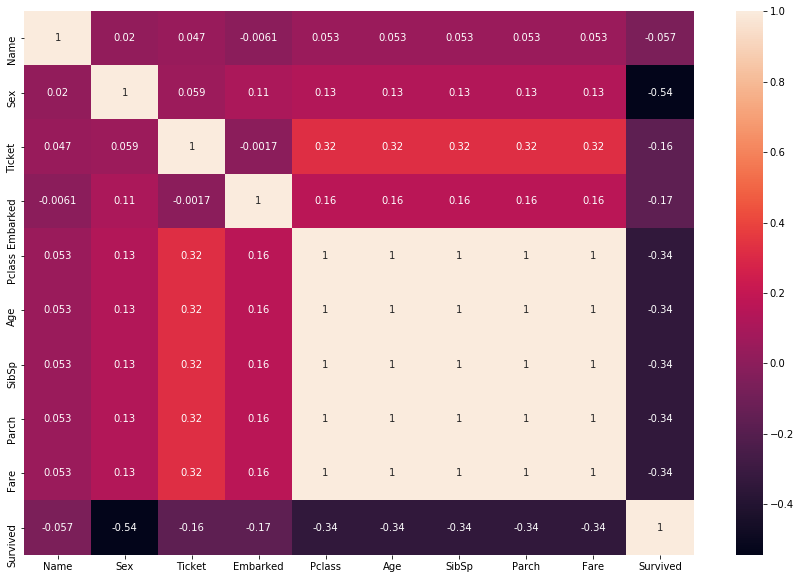

In [32]:
#Plotting the Heatmap to find the Correlation among the Columns
fig, ax = plt.subplots(figsize= (15, 10))
corr = df_final.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

- Sex is the Highly Negatively correlated with the Survivied Column.

- Age, Sibblings/ Spouses, Parents/Childern, Fare and Pclass are next Negatively correlated Variables with the Survivied Column.

- Ticket is the column which is Highly Positively Corralted with Age, Sibblings/ Spouses, Parents/Childern, Fare and Pclass columns which lead multicollinearity.

In [33]:
X = df_final.loc[:,df_final.columns[:-1]]

print(X.shape, y.shape)

(891, 9) (891,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

print("Train: ", X_train.shape, "Test :", X_test.shape, y_train.shape, y_test.shape, sep = '\t')

Train: 	(712, 9)	Test :	(179, 9)	(712,)	(179,)


In [35]:
print(X_train.dtypes)

Name          int64
Sex           int64
Ticket        int64
Embarked      int64
Pclass      float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
dtype: object


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, classification_report



dc = DecisionTreeClassifier( splitter='random')

model = dc.fit(X_train, y_train)
y_train_pred  = model.predict(X_train) 
y_pred_dc= model.predict(X_test)


print("\n\n")
#checking the Accuracy During the validation phase
print("Test accuracy Score: ", accuracy_score(y_test, y_pred_dc))
print("Test F1 score: ", f1_score(y_test, y_pred_dc))

print("CONFUSION_MATRIX: ")
pd.crosstab(y_test, y_pred_dc, rownames=['True'], colnames=['Predicted'], margins=True)




Test accuracy Score:  0.7988826815642458
Test F1 score:  0.7567567567567567
CONFUSION_MATRIX: 


Predicted,0,1,All
True,,,
0,87,18,105
1,18,56,74
All,105,74,179


- There are 36 mis classified labels with accuracy score of 80% and F1 score as 76%.

- majority of miss classifications are observed in which 16 survivors are classifed as Non Survivors and 20 Non Survivors are classified as Survivors.

- we use more classfication algorithms to see if we can improve the accuracy of the model.

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

print("CONFUSION MATRIX: ")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.776536312849162
F1 score:  0.736842105263158
CONFUSION MATRIX: 


Predicted,0,1,All
Actual,,,
0,83,22,105
1,18,56,74
All,101,78,179


- Here Total 40 labels are miss classified out of which 18 are classified as Non-Survivors but are actually survivors and 22 are classified as Survivors but are classfied as Non-survivors.
- Comparing to regression model DecisionTree classifier worked better.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

kc = KNeighborsClassifier()
model = kc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Confusion Matrix: ")
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"], margins=True)

Accuracy Score:  0.659217877094972
F1 Score:  0.5481481481481482
Confusion Matrix: 


Predicted,0,1,All
Actual,,,
0,81,24,105
1,37,37,74
All,118,61,179


- 61 points are missclassified out of which are 37 are classified as Non-survivors but are Survivors and 24 are Non-survivors which are classified as survivors.
- Comparing Knearest neighbour classfier with the Decision tree and logistic Regression Decision Tree preofrmed better accuracy.

In [39]:
from sklearn.svm import SVC

sc = SVC()
model = sc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=['Predicted'], margins=True)

Accuracy Score:  0.664804469273743
F1 Score:  0.3877551020408163
Confusion Matrix


Predicted,0,1,All
Actual,,,
0,100,5,105
1,55,19,74
All,155,24,179


- 55 number of Survivors are misclassified as non-survivors.
- 5 number of non-survivors are misclassified as survivors.

- But if we consider the situation of survivors this model performed good because we want more number people to survived but because of less accuracy the model is not preffered.

- After comparing with all the algorithsm Decison Tree classifier has performed better than all the algorithms

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)



# Bagging
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=29), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=29
)

bag_clf.fit(X_train, y_train)
pred_bagging = bag_clf.predict(X_test)


#Boosting
# Boosting
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=50
)

ada_clf.fit(X_train, y_train)
pred_boosting = ada_clf.predict(X_test)


print("Bagging accuracy:",accuracy_score(y_test, pred_bagging))
print("Bagging f1 score:",f1_score(y_test, pred_bagging))
print("\n")
print("Boosting accuracy:",accuracy_score(y_test, pred_boosting))
print("Boosting f1 score:",f1_score(y_test, pred_boosting))
print("\n")

print("Confusion Matrix for Decision_Tree Classifier: ")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Decision Tree'], margins=True)

Bagging accuracy: 0.7877094972067039
Bagging f1 score: 0.7076923076923075


Boosting accuracy: 0.7877094972067039
Boosting f1 score: 0.7397260273972601


Confusion Matrix for Decision_Tree Classifier: 


Decision Tree,0,1,All
Actual,,,
0,100,5,105
1,55,19,74
All,155,24,179


In [41]:
print("Confusion Matrix for  afte Bagging: ")
pd.crosstab(y_test, pred_bagging, rownames=['Actual'], colnames=['Bagging'], margins=True)

Confusion Matrix for  afte Bagging: 


Bagging,0,1,All
Actual,,,
0,95,10,105
1,28,46,74
All,123,56,179


In [42]:
print("Confusion Matrix for Boosting: ")
pd.crosstab(y_test, pred_boosting, rownames=['Actual'], colnames=['Boosting'], margins=True)

Confusion Matrix for Boosting: 


Boosting,0,1,All
Actual,,,
0,87,18,105
1,20,54,74
All,107,72,179


- Even after Applying bagging and boosting there was no such imporovement in the.
- Decision tree classfier is the highest accuracte model within this context

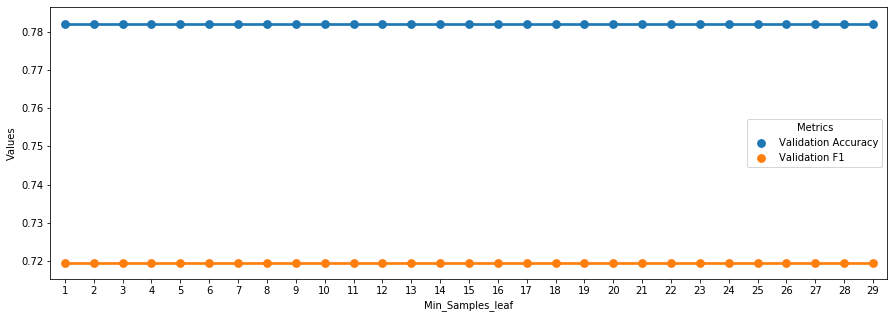

In [43]:
val_acc= []
val_f1_c = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,30): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_pred = tree_clf.predict(X_test)

    val_accuracy = accuracy_score(y_test,y_pred)
    val_f1 = f1_score(y_test,y_pred)
    
    
   
    val_acc.append(val_accuracy)
    val_f1_c.append(val_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Validation Accuracy": val_acc, "Validation F1":val_f1_c, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)
plt.show()